In [1]:
!conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
affine                    2.4.0                    pypi_0    pypi
aiofiles                  22.1.0                   pypi_0    pypi
aiohttp                   3.8.4                    pypi_0    pypi
aiosignal                 1.3.1                    pypi_0    pypi
aiosqlite                 0.19.0                   pypi_0    pypi
alembic                   1.11.1             pyhd8ed1ab_0    conda-forge
anyio                     3.7.0              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3    conda-forge
arrow                     1.2.3                    pypi_0    pypi
asdc                      1.1.0                    pypi_

In [7]:
%%bash
source activate spsaswat_test1

In [11]:
%conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
affine                    2.4.0                    pypi_0    pypi
aiofiles                  22.1.0                   pypi_0    pypi
aiohttp                   3.8.4                    pypi_0    pypi
aiosignal                 1.3.1                    pypi_0    pypi
aiosqlite                 0.19.0                   pypi_0    pypi
alembic                   1.11.1             pyhd8ed1ab_0    conda-forge
anyio                     3.7.0              pyhd8ed1ab_1    conda-forge
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3    conda-forge
arrow                     1.2.3                    pypi_0    pypi
asdc                      1.1.0                    pypi_

In [4]:
!pip install numpy --pre torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu118

Looking in indexes: https://download.pytorch.org/whl/nightly/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 39.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 1.1 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 1.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.1 MB

In [5]:
import torch

is_available = torch.cuda.is_available()

if is_available:
    print("CUDA is available!")
    print("Number of GPUs available:", torch.cuda.device_count())
    print("GPU:", torch.cuda.get_device_name(0))
    print(torch.cuda.current_device())
    print(torch.cuda.device(0))
else:
    print("CUDA is not available.")

CUDA is available!
Number of GPUs available: 2
GPU: NVIDIA A40
0


In [36]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

base


In [15]:
import os
import sys
import cv2
import json
import time

# import open3d as o3d
import copy
import glob
import argparse
import tqdm
!pip install natsort
from natsort import natsorted
from scipy.spatial.transform import Rotation as R

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns
%matplotlib inline
# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [17]:
import zipfile

with zipfile.ZipFile('./custom_lib.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [29]:
with zipfile.ZipFile('./2023-09-14.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [20]:
from custom_lib.geometry import *
from custom_lib.hyperspectral import HyperspectralImage
from custom_lib.utils import *

In [21]:
# set header to 16 bits
def update_line(l):
    if l.strip() == 'NBITS 12':
        return 'NBITS 16\n'
    return l


def update_hdr_file(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    lines = [update_line(l) for l in lines]

    with open(path, 'w') as f:
        f.writelines(lines)

In [22]:
def hypMask(file_name):
    img = cv2.imread(file_name)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (40, 107, 110), (86, 255,255))
    
    ## slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    
    # Convert the 'green' image to grayscale to make it single channel
    th = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)

    # Set the grayscale values to 255 where mask is >0
    th[th > 0] = 255
       
    return th

def hypMaskCI(file_name):
    img = cv2.imread(file_name)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (40, 107, 110), (86, 255,255))
    
    ## slice the green
    imask = mask>0
    masked = np.zeros_like(img, np.uint8)
    masked[imask] = img[imask]
    
    # Convert the 'green' image to grayscale to make it single channel
    th = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)

    # Set the grayscale values to 255 where mask is >0
    th[th > 0] = 255
    return th, img, masked

(385, 500, 3)


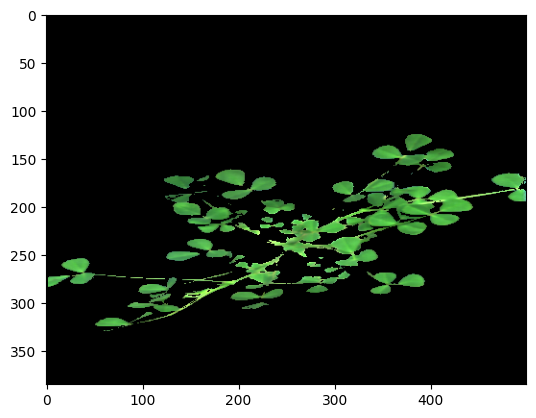

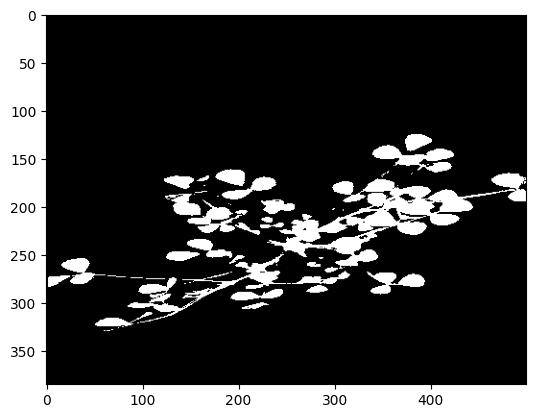

In [28]:
import cv2
import numpy as np

## Read
img = cv2.imread("./2023-09-14_15-10-07.png")

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
# mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))
mask = cv2.inRange(hsv, (40, 107, 110), (86, 255,255))
## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

print(np.shape(green))

## save 
plt.imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))  # Use 'cmap' if your image is grayscale
plt.show()



# Convert the 'green' image to grayscale
green_1ch = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)

# Set the grayscale values to 0 where mask is 0
# green_1ch[mask == 0] = 0

# Set the grayscale values to 255 where mask is >0
green_1ch[green_1ch > 0] = 255

# Display the resulting single-channel image
plt.imshow(green_1ch, cmap='gray')  # Use 'cmap' if your image is grayscale
plt.show()

['./2023-09-14/2023-09-14_15-10-07.png', './2023-09-14/2023-09-14_15-10-35.png']
['./2023-09-14/2023-09-14--15-09-31_round-0_cam-1_calibFrame.hdr', './2023-09-14/2023-09-14--15-09-36_round-0_cam-1_calibFrame.hdr']
2
2
white: ./2023-09-14/2023-09-14--15-09-31_round-0_cam-1_calibFrame
dark: ./2023-09-14/2023-09-14--15-09-36_round-0_cam-1_calibFrame
img_path ./2023-09-14/2023-09-14--15-10-07_round-0_cam-1_tray-Tray_1


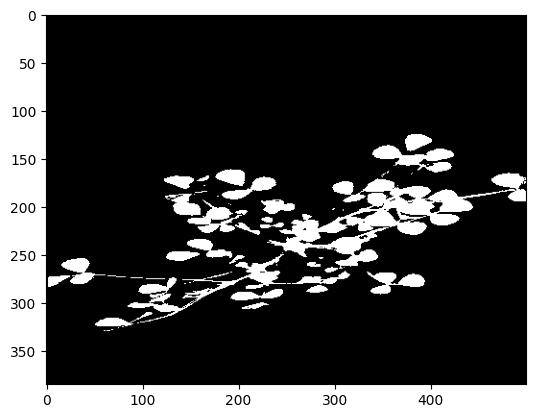

Error fixed


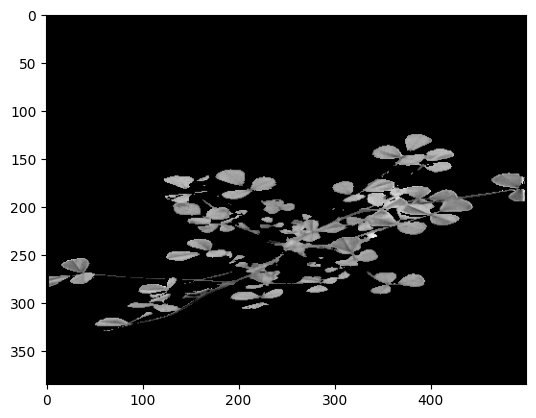

Average of all pixels in NDRE:  0.20105278664377715
0.0
0.34521600801679264
img_path ./2023-09-14/2023-09-14--15-10-35_round-0_cam-1_tray-Tray_2


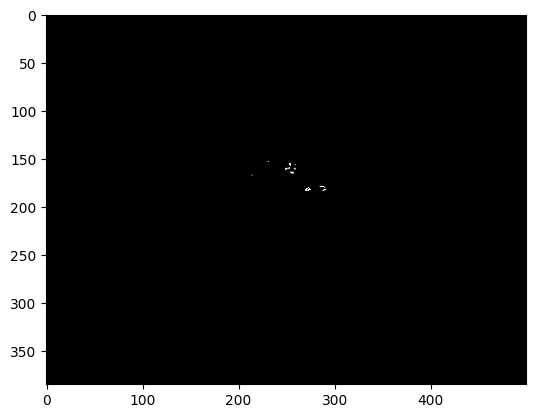

Error fixed


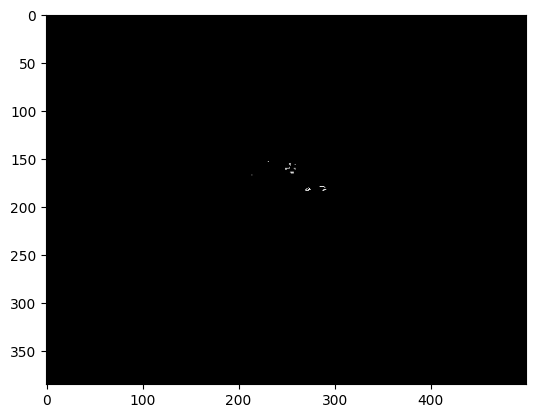

Average of all pixels in NDRE:  0.09875359539907823
0.0
0.12823078605747293
success


In [35]:
no_t = 2 # number of trays
root_path = "./2023-09-14/"

img_i = 0
cf_i = 0
const_HypImg = '_round-0_cam-1_tray-Tray_'
all_img_path = natsorted(glob.glob(os.path.join(root_path, '*.png'),recursive=False)) # make it true for multiple batches
print(all_img_path)
all_calib_file = natsorted(glob.glob(os.path.join(root_path, '*_round-0_cam-1_calibFrame.hdr'),recursive=False)) # make it true for multiple batches
print(all_calib_file)

l_imgs = len(all_img_path)
print(len(all_img_path))
print(len(all_calib_file))

for i in range(int(l_imgs/no_t)):
    if (img_i == l_imgs - 1):
        break
    # Extract base name without extension for white_calib and dark_calib 
    # Combine with root_path
    white_calib = os.path.join(root_path, os.path.splitext(os.path.basename(all_calib_file[i]))[0])
    dark_calib = os.path.join(root_path, os.path.splitext(os.path.basename(all_calib_file[i+1]))[0])
    
    print('white:', white_calib)
    print('dark:', dark_calib)
    
    for k in range(0,no_t):
        hyperspec_reference_path = all_img_path[img_i]
        tmp = os.path.splitext(os.path.basename(hyperspec_reference_path))[0].split('_')
        tmp = '--'.join(tmp)
        hyperspec_image_path = os.path.join(root_path, tmp+const_HypImg+str(k+1))
        print('img_path', hyperspec_image_path)
        image_hyperspec = HyperspectralImage(hyperspec_image_path, white_calib, dark_calib)
        calib_layers = image_hyperspec.extract_all_layers()

        hyper = calib_layers[1].astype(np.float64)
        wavelength = calib_layers[0]

        #           mask used for all traits
        th_ind = hypMask(hyperspec_reference_path)
        
        th_ind, img, masked = hypMaskCI(hyperspec_reference_path)
        
        # Display the resulting single-channel image
        # cv2.imshow("img_thresh", th_ind)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        plt.imshow(th_ind, cmap='gray')  # Use 'cmap' if your image is grayscale
        plt.show()


        # Checking for possible errors and fixing
        minWavelength = hyper[:, :, 0]
        masked_minWave = cv2.bitwise_and(minWavelength, minWavelength, mask = th_ind)
        avg_minWave = np.sum(masked_minWave)/np.count_nonzero(th_ind)

        maxWavelength = hyper[:, :, len(wavelength)-1]
        masked_maxWave = cv2.bitwise_and(maxWavelength, maxWavelength, mask = th_ind)
        avg_maxWave = np.sum(masked_maxWave)/np.count_nonzero(th_ind)

        if avg_minWave > avg_maxWave: # starting from 27 DAS
            hyper = 1 - hyper
            print("Error fixed")
            
        ind_name = "_NDRE"
        index, _ = get_ndre(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        # Display the resulting single-channel image
        # cv2.imshow("index_thresh", masked_ind)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        
        plt.imshow(masked_ind, cmap='gray')  # Use 'cmap' if your image is grayscale
        plt.show()
        
        print('Average of all pixels in NDRE: ',np.sum(masked_ind)/np.count_nonzero(th_ind))
        print(np.min(masked_ind))
        print(np.max(masked_ind))
        
        
            
        #             increase the image iterator
        img_i += 1
    
    #             increase the calibfile iterator
    cf_i += 2
    print('success')
    


In [1]:
!conda activate spsaswat_test1


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [4]:
!source ~/.bashrc

!conda activate spsaswat_test1


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.





CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


